# Import library and import data

In [64]:
import chess
import chess.pgn as pgn
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

# ETL data
**Caution: If the directory "./piece-analysis.csv" existed and had data, you can pass this part.**


This part is used to extract, transform and load data from the raw chess game data in order to create a new dataset

In [ ]:
players = ['Caruana', 'Polgar', 'Fischer', 'Morphy', 'Botvinnik', 'Tal',
 'Kasparov', 'Anand', 'Carlsen', 'Nakamura', 'Alekhine', 'Capablanca']

In [71]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 'p', 'r', 'n', 'b', 'q']

piece_map = {'P': [0] * 400, 'N': [0] * 400, 'B': [0] * 400, 'R': [0] * 400, 'Q': [0] * 400, 
    'p': [0] * 400, 'n': [0] * 400, 'b': [0] * 400, 'r': [0] * 400, 'q': [0] * 400}

end_game_turn = [0] * 400 

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink, encoding="utf-8")

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      board_str = str(board)
      for piece in board_str:
        if piece not in [' ', 'K', 'k', '\n', '.']:
          piece_map[piece][turn] += 1
    
    end_game_turn[turn] += 1

In [72]:
# Change piece data to dataframe
piece_data = pd.DataFrame(piece_map)

# Drop zeros rows (the row with all values is zero)
piece_data = piece_data[(piece_data.T != 0).any()]

# Add a turn column to the first column
piece_data.insert(loc=0, column = 'Turn', value = range(1, len(piece_data) + 1))

# Save dataframe to csv file
piece_data.to_csv('piece-analysis.csv', index=False)

# Visualize your data to make analysis

In [3]:
piece_data = pd.read_csv("piece-analysis.csv")

In [103]:
# There are 21392 valid game in this dataset so we div
piece_data.iloc[:, 1:11] = piece_data.iloc[:, 1:11].div(21392)

In [5]:
piece_data

,Turn,P,N,B,R,Q,p,n,b,r,q
0,1,8.000000,2.0,2.0,2.000000,1.0,8.000000,2.000000,2.0,2.0,1.0
1,2,8.000000,2.0,2.0,2.000000,1.0,8.000000,2.000000,2.0,2.0,1.0
2,3,8.000000,2.0,2.0,2.000000,1.0,7.993876,2.000000,2.0,2.0,1.0
3,4,7.978263,2.0,2.0,2.000000,1.0,7.993876,2.000000,2.0,2.0,1.0
4,5,7.978263,2.0,2.0,2.000000,1.0,7.959144,1.998831,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
358,359,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
359,360,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
360,361,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
361,362,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0


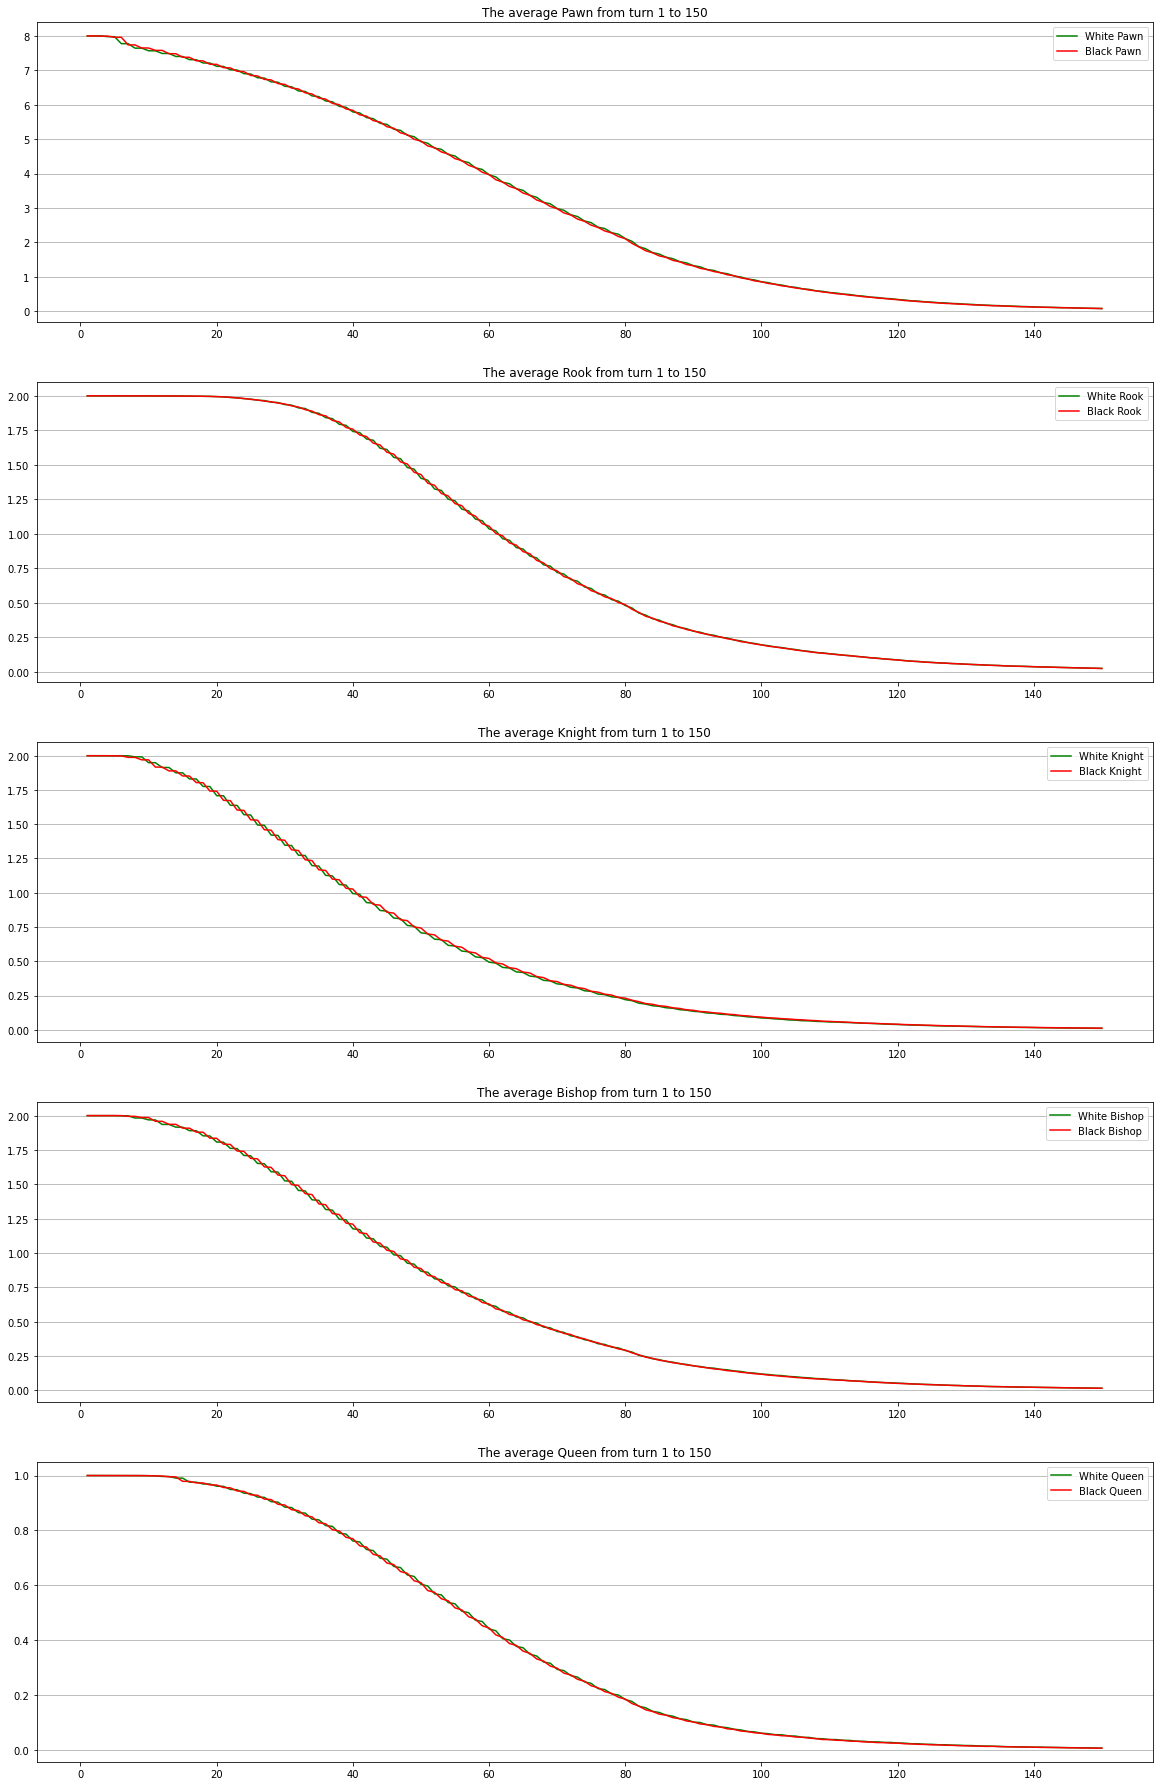

In [104]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 
            'p', 'r', 'n', 'b', 'q']
titleOfPiece = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}

# Initialize figure and axis
fig, ax = plt.subplots(5, figsize=(20, 32))

'''
We only use 150 turns to visualize and do analysis because the number of
each chess piece nears zero value. So, it makes nonsense to visualize
this part of a game. Therefore, after turn 150 (or 75 in real life), 
the game seems in the end game.
'''
stop_point = 150

for i in range(0, 5):

  turn = piece_data['Turn'][0:stop_point]
  wp = piece_data[chess_pieces[i]][0:stop_point]
  bp = piece_data[chess_pieces[i + 5]][0:stop_point]  
  
  first_label = 'White ' + titleOfPiece[chess_pieces[i + 5]]
  second_label = 'Black ' + titleOfPiece[chess_pieces[i + 5]]

  # Plot lines
  ax[i].plot(turn, wp , color="green", label = first_label)
  ax[i].plot(turn, bp, color="red", label = second_label)

  ax[i].legend()
  ax[i].grid(axis='y')
  ax[i].set_title('The average ' +  titleOfPiece[chess_pieces[i + 5]] + ' from turn 1 to 150')

fig.patch.set_facecolor('white')
plt.savefig('piece-analysis1.png')
plt.show()

Dáng điệu cả 4 đồ thị của các quân xe, mã, tịnh, hậu đều tựa nhau,số lượng quân hầu như không thay đổi ở các nước đi đầu và giảm mạnh vào trung cuộc. tuy nhiên có khác biệt ở số lượng các nước đi đầu mà các quân cờ duy trì số lượng nguyên vẹn. 

> Đối với xe, ở 20 nước cờ đầu tiên hầu như không có quân xe nào bị mất là do đặc thù vị trí của 2 quân xe ở trong góc bàn cờ nên không tham gia nhiều trong khai cuộc.

> Mã và tịnh cũng tương tự với 6 nước cờ đầu, đây đều là những nước cờ khai cuộc. Từ nước cờ thứ 10 đến 20, số quân mã và tịnh có xu hướng giảm mạnh vì các đấu thủ có xu hướng trao đổi các quân cờ của mình tại những nước này, báo hiệu kết thúc khai cuộc và bắt đầu đi vào trung cuộc.

> Số lượng hậu trung bình trong 10 nước đầu vẫn là 1, tuy nhiên có xu hướng giảm mạnh tại các nước cờ từ 15 đến 20 có thể do các đấu thủ lựa chọn trao đổi quân hậu.

Khác với 4 đồ thị còn lại, đồ thị số quân tốt giảm đều theo số lượng nước đi, bởi vì tốt tham gia rất tích cực trên bàn cờ tại hầu như mọi thời điểm.  

(Eng version:
The appearance of all 4 graphs of the rooks, knights, bishops , and queen are similar, the number of pieces is almost unchanged in the leading countries and decreases sharply in the middle. However, there is a difference in the number of leading moves where the pieces remain intact.

> For rooks, in the first 20 moves, almost no rooks were lost because of the peculiarity of the position of 2 rooks in the corner of the chessboard, so they did not participate much in the opening.

> Knight and bishop are similar to the first 6 moves, these are all opening moves. From the 10th to 20th moves, the number of knights and bishops tends to decrease sharply as players tend to exchange their pieces in these moves, signaling the end of the opening and the beginning of the middlegame.

> The average number of queen in the first 10 moves is still 1, however there is a sharp decline in moves between 15 and 20 possibly due to the players choosing to swap queens.

Unlike the other 4 graphs, the pawn graph decreases steadily with the number of moves, because the pawn is very actively involved on the board at almost all times.
)

## Total chess piece odd between two player for each turn
Suppose that the value of each chess piece include pawn, knight, bishop, rook, queen is 1, 3, 3, 5, 9 respectively

In [105]:
# The odd between the white pieces and black piece
piece_data['Odd'] = piece_data['P'] + piece_data['N'] * 3 + piece_data['B'] * 3 + piece_data['R'] * 5 \
              + piece_data['Q'] * 9 - piece_data['p'] - piece_data['n'] * 3 - piece_data['b'] * 3 \
                - piece_data['r'] * 5 - piece_data['q'] * 9

piece_data['Abs Odd'] = piece_data['Odd'].abs()

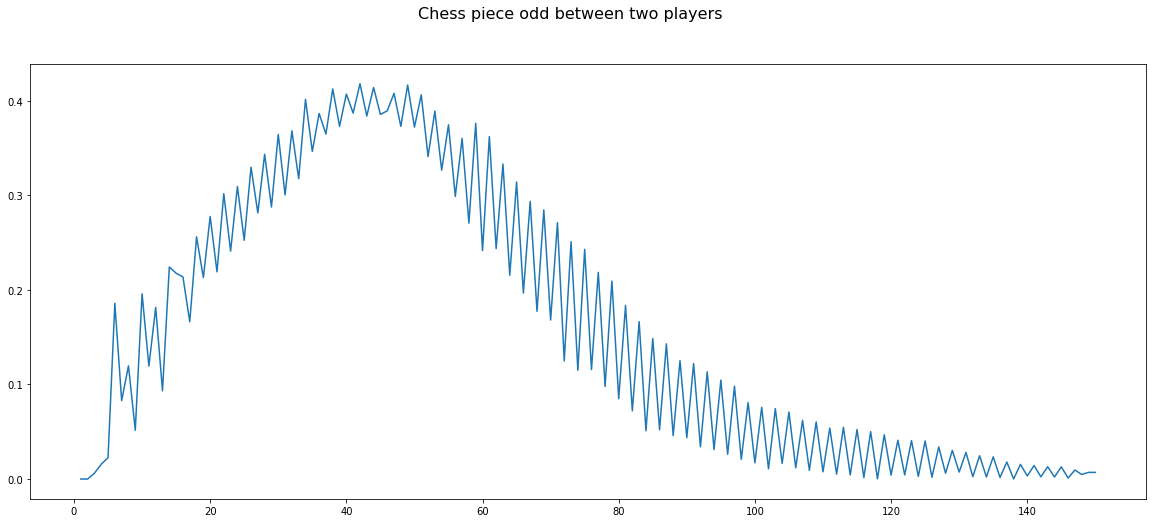

In [109]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot('Turn', 'Abs Odd', data=piece_data.iloc[0:150])
fig.patch.set_facecolor('white')
plt.savefig('piece-analysis2.png')
plt.suptitle('Chess piece odd between two players', fontsize = 16)
plt.show()

Viet phan tich tai day nha cung la phan tich cho hinh tren nha

Viet phan tich tai day nha cung la phan tich cho hinh tren nha
Đồ thị dao động là do hầu hết các quân cờ mất đi đều là do các đấu thủ lựa chọn trao đổi các quân cờ của nhau. Cách biệt tăng mạnh tại các nước từ 30 đến 50, nếu không thể kết thúc ván cờ tại thời điểm này, các đấu thủ sẽ đến với giai đoạn cờ tàn. Như trên đồ thị biểu diễn, tại giai đoạn này cách biệt về số lượng và chất lượng quân cờ là rất nhỏ.

Eng ver:
The graph fluctuates because most of the lost pieces are due to the players choosing to trade each other's pieces. The gap increases sharply in countries move 30th to 50th, if it is not possible to end the game at this time, the players will come to the end of the game. As the graph shows, at this stage the difference in number and quality of pieces is very small.